# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "버스 정류장 데이터" 를 확인해 보도록 하겠습니다

## 데이터 안내

[기본 데이터]
* 1.1 BUS_STATION_BOARDING_MONTH_202204.csv

* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station.csv

* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '1.1 BUS_STATION_BOARDING_MONTH_202204.csv'파일을 'bus_station' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요

In [57]:
import sys
import numpy as np
import pandas as pd

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station = pd.read_csv("1.1 BUS_STATION_BOARDING_MONTH_202204.csv", sep=",", encoding = "cp949")

In [6]:
# 데이터 프레임의 Shape을 확인합니다. (1169878, 8)
bus_station.shape

(1169878, 8)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'bus_station' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [7]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [8]:
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503
1169877,20220430,201,201번(구리~서울역),06280,영휘원사거리.(구)홍릉사거리,122,49,20220503


In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 71.4+ MB


- 노선번호, 노선명, 버스정류장ARS번호, 역명 : object(문자열) (4개)
- 사용일자, 승차총승객수, 하차총승객수, 등록일자 : 숫자형 (4개)
- null 데이터 없음

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station.describe() #숫자형 변수에 대해 기초통계량 출력

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.169878e+06,1.169878e+06,1.169878e+06,1.169878e+06
mean,2.022042e+07,1.108042e+02,1.082804e+02,2.022043e+07
std,8.661492e+00,1.554787e+02,1.420829e+02,2.667754e+01
min,2.022040e+07,0.000000e+00,0.000000e+00,2.022040e+07
25%,2.022041e+07,1.800000e+01,2.100000e+01,2.022041e+07
50%,2.022042e+07,6.300000e+01,6.800000e+01,2.022042e+07
75%,2.022042e+07,1.460000e+02,1.450000e+02,2.022043e+07
max,2.022043e+07,3.990000e+03,3.615000e+03,2.022050e+07


In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


#### [실습문제3] 위 데이터에서 버스정류장 위치를 구 별로 구분 하고 싶습니다.

* 'bus_station' 데이터의 정보를 확인해보세요.

* 어떻게 해야 할까요?? (tip! 버스정류장ARS번호의 앞 두자리가 구를 의미합니다.)

* '자치구' column을 추가하여 정류장이 위치한 구 이름을 등록해주세요.


In [13]:
# bus_station에서 버스정류장ARS번호의 정보를 확인해보세요.
bus_station["버스정류장ARS번호"]

0          06243
1          06242
2          06238
3          06309
4          11428
           ...  
1169873    12004
1169874    06278
1169875    16555
1169876    25236
1169877    06280
Name: 버스정류장ARS번호, Length: 1169878, dtype: object

In [14]:
# 버스정류장 ARS 번호의 앞자리 2개로 새로 컬럼 생성합니다
bus_station["자치구"] = bus_station["버스정류장ARS번호"].str.slice(start = 0, stop = 2)
bus_station["자치구"]

0          06
1          06
2          06
3          06
4          11
           ..
1169873    12
1169874    06
1169875    16
1169876    25
1169877    06
Name: 자치구, Length: 1169878, dtype: object

* 버스정류장 ARS 번호 - 01~25까지 앞 숫자 두개가 위치한 구를 의미
    01. 종로구
    02. 중구
    03. 용산구
    04. 성동구
    05. 광진구
    06. 동대문구
    07. 중랑구
    08. 성북구
    09. 강북구
    10. 도봉구
    11. 노원구
    12. 은평구
    13. 서대문구
    14. 마포구
    15. 양천구
    16. 강서구
    17. 구로구
    18. 금천구
    19. 영등포구
    20. 동작구
    21. 관악구
    22. 서초구
    23. 강남구
    24. 송파구
    25. 강동구

In [15]:
# 구 코드를 구 이름으로 변환합니다
bus_station["자치구"] = bus_station["자치구"].map({"01" : "종로구", "02" : "중구", "03" : "용산구", "04" : "성동구", "05" : "광진구",
                               "06" : "동대문구", "07" : "중랑구", "08" : "성북구", "09" : "강북구", "10" : "도봉구",
                               "11" : "노원구", "12" : "은평구", "13" : "서대문구", "14" : "마포구", "15" : "양천구",
                               "16" : "강서구", "17" : "구로구", "18" : "금천구", "19" : "영등포구", "20" : "동작구",
                               "21" : "관악구", "22" : "서초구", "23" : "강남구", "24" : "송파구", "25" : "강동구"
                              })

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. (head, tail 등)
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구


#### [실습문제4] 결측치를 처리 합시다 



In [17]:
# (가상기점),(가상종점)때문에 ARS번호가 '~'로 나오는 곳이 있습니다 확인해볼까요?
print(bus_station["버스정류장ARS번호"].value_counts(), end = "\n\n") # ~가 5174개 있다, 진짜 정류장은 12494 - 5174 = 7320개
print(bus_station.loc[bus_station["버스정류장ARS번호"] == "~"])

~        5174
01023     835
01044     819
02142     809
01013     778
         ... 
03538       1
03554       1
19994       1
20963       1
20965       1
Name: 버스정류장ARS번호, Length: 12494, dtype: int64

             사용일자  노선번호                     노선명 버스정류장ARS번호              역명  \
747      20220401  750B        750B번(은평차고지~서울대)          ~     은평공영차고지(가상)   
852      20220401   602       602번(양천공용차고지~시청앞)          ~   양천공영차고지(기점가상)   
1048     20220401  2227      2227번(중랑공영차고지~중곡역)          ~   중랑공영차고지(기점가상)   
1252     20220401  2311        2311번(중랑차고지~문정동)          ~   중랑공영차고지(기점가상)   
1479     20220401  2312  2312번(중랑공영차고지~강동공영차고지)          ~   중랑공영차고지(기점가상)   
...           ...   ...                     ...        ...             ...   
1168831  20220430  1119   1119번(강북청소년수련관난나~녹천역)          ~      선일교통종점(가상)   
1169138  20220430  5523   5523번(보성운수기종점~서울대입구역)          ~     보성운수기종점(가상)   
1169509  20220430   153         153번(우이동~당곡사거리)          ~  우이동도선사입구(기점가상)   
1169612  20220430  

In [18]:
# NaN 값을 제거 하겠습니다
bus_station = bus_station.dropna()

In [19]:
# 다시 bus_station의 정보를 확인해볼까요?
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064594 entries, 0 to 1169877
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1064594 non-null  int64 
 1   노선번호        1064594 non-null  object
 2   노선명         1064594 non-null  object
 3   버스정류장ARS번호  1064594 non-null  object
 4   역명          1064594 non-null  object
 5   승차총승객수      1064594 non-null  int64 
 6   하차총승객수      1064594 non-null  int64 
 7   등록일자        1064594 non-null  int64 
 8   자치구         1064594 non-null  object
dtypes: int64(4), object(5)
memory usage: 81.2+ MB


In [20]:
# 버스정류장ARS번호의 type을 변경해볼까요?
bus_station = bus_station.astype({"버스정류장ARS번호" : "int64"})

In [21]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064594 entries, 0 to 1169877
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1064594 non-null  int64 
 1   노선번호        1064594 non-null  object
 2   노선명         1064594 non-null  object
 3   버스정류장ARS번호  1064594 non-null  int64 
 4   역명          1064594 non-null  object
 5   승차총승객수      1064594 non-null  int64 
 6   하차총승객수      1064594 non-null  int64 
 7   등록일자        1064594 non-null  int64 
 8   자치구         1064594 non-null  object
dtypes: int64(5), object(4)
memory usage: 81.2+ MB


#### [실습문제5] 구별로 버스정류장이 몇 개 있는지 궁금합니다

* 구별로 버스 정류장의 개수를 확인해 주세요
* 버스 정류장 데이터랑 같이 하는데 뭔가 이상할 것이다.(data.seoul~) 승하차는 서울시로부터 올라오는 데이터가 있다?

In [22]:
# nunique로 고유값의 갯수만 확인해볼게요
bus_station_count = bus_station.groupby(bus_station["자치구"])["버스정류장ARS번호"].nunique()
bus_station_count

자치구
강남구     506
강동구     373
강북구     413
강서구     566
관악구     468
광진구     272
구로구     486
금천구     345
노원구     515
도봉구     361
동대문구    306
동작구     442
마포구     568
서대문구    460
서초구     600
성동구     436
성북구     606
송파구     416
양천구     323
영등포구    467
용산구     323
은평구     501
종로구     350
중구      178
중랑구     423
Name: 버스정류장ARS번호, dtype: int64

In [23]:
# 강남구와 서초구에 500 개가 넘는 버스정류장이 있다는데, 확인해봅시다.
bus_station_unique = bus_station.groupby("자치구")["버스정류장ARS번호"].unique()

In [24]:
# np.set_printoptions(threshold = sys.maxsize)

In [25]:
print(bus_station_unique["강남구"])

[23783 23081 23074 23062 23045 23061 23771 23419 23420 23421 23405 23423
 23424 23425 23150 23404 23406 23465 23380 23381 23382 23362 23395 23240
 23511 23509 23242 23197 23192 23172 23173 23174 23175 23180 23161 23155
 23151 23430 23429 23149 23157 23159 23182 23183 23184 23186 23187 23189
 23199 23244 23245 23236 23360 23361 23449 23383 23384 23450 23385 23407
 23408 23320 23426 23427 23428 23411 23416 23417 23418 23287 23288 23305
 23306 23259 23260 23201 23217 23218 23277 23280 23283 23284 23196 23188
 23171 23166 23165 23158 23156 23148 23104 23102 23101 23103 23167 23169
 23170 23198 23473 23438 23249 23262 23224 23225 23226 23227 23456 23334
 23335 23336 23457 23338 23459 23339 23340 23326 23327 23228 23229 23233
 23234 23247 23248 23168 23531 23190 23210 23212 23216 23290 23178 23432
 23162 23163 23160 23507 23127 23200 23136 23213 23211 23191 23243 23202
 23203 23393 23442 23527 23530 23463 23471 23447 23480 23437 23110 23111
 23112 23124 23125 23181 23137 23482 23448 23138 23

In [26]:
# 서울의 버스 정류장 데이터만 포함하고 있는 csv 파일 입니다 (서울 공공데이터 포탈)
# https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do
only_seoul = pd.read_csv("1.1 bus_station.csv", sep=",", encoding = "UTF-8")

In [27]:
# 서울의 버스정류장 데이터의 정보를 확인해보세요.
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS-ID  10935 non-null  int64 
 1   정류소명    10935 non-null  object
dtypes: int64(1), object(1)
memory usage: 171.0+ KB


In [28]:
# 데이터를 자세히 살펴볼까요?
only_seoul.head()

,ARS-ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [29]:
# 아까 전에 네이버 지도로 확인했던 정류장ARS번호를 찾아볼까요?
only_seoul.loc[only_seoul["ARS-ID"] == 23783]

,ARS-ID,정류소명


In [30]:
# 데이터의 컬럼명을 바꿔볼까요? (to 버스정류장ARS번호)
only_seoul.rename(columns={"ARS-ID" : "버스정류장ARS번호"}, inplace = True)

In [31]:
# 서울시 버스정류장 데이터와 bus_station을 합쳐볼까요? 
df = pd.merge(only_seoul, bus_station, how="inner", on = "버스정류장ARS번호")

In [32]:
# 합쳐진 데이터를 확인해볼까요?
df

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20220401,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리,4,9,20220404,종로구
1,1001,종로2가사거리,20220401,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리,5,6,20220404,종로구
2,1001,종로2가사거리,20220401,741,741번(진관차고지~헌인릉입구),종로2가사거리,206,203,20220404,종로구
3,1001,종로2가사거리,20220401,470,470번(상암차고지~안골마을),종로2가사거리,303,239,20220404,종로구
4,1001,종로2가사거리,20220402,741,741번(진관차고지~헌인릉입구),종로2가사거리,132,159,20220405,종로구
...,...,...,...,...,...,...,...,...,...,...
1060881,25990,암사삼성.현대아파트,20220426,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,89,30,20220429,강동구
1060882,25990,암사삼성.현대아파트,20220427,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,88,40,20220430,강동구
1060883,25990,암사삼성.현대아파트,20220428,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,82,33,20220501,강동구
1060884,25990,암사삼성.현대아파트,20220429,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,96,37,20220502,강동구


In [33]:
# 구 별로 버스 정류장의 개수를 확인해 주세요
seoul_bus_station_ARS = df.groupby(df["자치구"], as_index = False)["버스정류장ARS번호"].nunique()

In [34]:
# 버스정류장ARS번호 갯수를 확인해볼까요?
df["버스정류장ARS번호"].nunique()

10615

#### [실습문제6] 구 별로 버스 노선이 몇 개나 지나가는지 궁금합니다.

* 구별로 버스 노선의 개수를 확인해 주세요

In [35]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station_line = df.groupby(df["자치구"], as_index = False)["노선번호"].nunique()

In [36]:
seoul_bus_station_line

,자치구,노선번호
0,강남구,91
1,강동구,21
2,강북구,67
3,강서구,49
4,관악구,86
5,광진구,41
6,구로구,79
7,금천구,58
8,노원구,57
9,도봉구,46


#### [실습문제7] 각 구별로 승차 총 승객수, 하차 총 승객수를 알아봅시다

* groupby 를 활용해 봅시다.

In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station_sum = df.groupby(df["자치구"], as_index = False)[["승차총승객수", "하차총승객수"]].nunique()
seoul_bus_station_sum

,자치구,승차총승객수,하차총승객수
0,강남구,1048,948
1,강동구,789,816
2,강북구,1187,1079
3,강서구,867,802
4,관악구,1507,1553
5,광진구,805,747
6,구로구,1166,1033
7,금천구,986,887
8,노원구,1021,936
9,도봉구,951,861


#### [실습문제8] 각 구별로 승차 평균 승객수, 하차 평균 승객수를 알아봅시다

In [38]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station_mean = df.groupby(df["자치구"], as_index = False)[["승차총승객수", "하차총승객수"]].mean()
seoul_bus_station_mean.head()
seoul_bus_station_mean.rename(columns = {"승차총승객수" : "승차평균승객수", "하차총승객수" : "하차평균승객수"}, inplace = True)

#### [실습문제9] 데이터 프레임을 합쳐보겠습니다. 

In [39]:
# 네 개 파일을 합쳐볼까요

# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean
a = pd.merge(seoul_bus_station_ARS, seoul_bus_station_line)
b = pd.merge(a, seoul_bus_station_sum)
seoul_bus_station = pd.merge(b, seoul_bus_station_mean)

In [40]:
seoul_bus_station

,자치구,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,1048,948,128.767927,121.371512
1,강동구,369,21,789,816,99.161194,97.118065
2,강북구,413,67,1187,1079,133.020373,128.791504
3,강서구,566,49,867,802,88.119480,87.587591
4,관악구,466,86,1507,1553,154.753674,157.516040
5,광진구,269,41,805,747,118.352546,118.523137
6,구로구,486,79,1166,1033,119.235615,114.140076
7,금천구,345,58,986,887,123.098370,116.751304
8,노원구,514,57,1021,936,88.476211,87.245168
9,도봉구,359,46,951,861,106.859356,103.855540


In [129]:
# column 이름을 바꿔주겠습니다.
seoul_bus_station.rename(columns = {"버스정류장ARS번호" : "정류장수", "노선번호" : "노선수"}, inplace = True)

In [42]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,1048,948,128.767927,121.371512
1,강동구,369,21,789,816,99.161194,97.118065
2,강북구,413,67,1187,1079,133.020373,128.791504
3,강서구,566,49,867,802,88.119480,87.587591
4,관악구,466,86,1507,1553,154.753674,157.516040


In [43]:
# 해당 데이터프레임을 'df_seoul_bus_station.csv' 파일로 저장하세요.
seoul_bus_station.to_csv("df_seoul_bus_station.csv", index = False)

In [59]:
temp = pd.read_csv("df_seoul_bus_station.csv")

In [61]:
temp["총 승객수"] = temp["승차총승객수"] + temp["하차총승객수"]

In [69]:
temp["총 이동수"] = temp2["총 이동 인구"]

In [102]:
temp["2030 이동"] = aaaa["나이"]

In [103]:
temp

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 승객수,총 이동수,2030 이동
0,강남구,499,91,1048,948,128.767927,121.371512,1996,19385709.60,4334565
1,강동구,369,21,789,816,99.161194,97.118065,1605,19715322.61,4444115
2,강북구,413,67,1187,1079,133.020373,128.791504,2266,14707082.87,4126350
3,강서구,566,49,867,802,88.119480,87.587591,1669,17449273.95,4234340
4,관악구,466,86,1507,1553,154.753674,157.516040,3060,17947278.99,3984245
5,광진구,269,41,805,747,118.352546,118.523137,1552,16288077.28,3972965
6,구로구,486,79,1166,1033,119.235615,114.140076,2199,13907465.59,3314750
7,금천구,345,58,986,887,123.098370,116.751304,1873,18757182.35,4140110
8,노원구,514,57,1021,936,88.476211,87.245168,1957,12570412.30,3111815
9,도봉구,359,46,951,861,106.859356,103.855540,1812,10821566.75,2717445


---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst  

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [87]:
mz = pd.read_csv("df_mz.csv")

In [92]:
mz

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,5,11010,11010,F,10,HE,10,5.96
1,202204,일,5,11010,11010,F,10,WH,10,5.88
2,202204,일,5,11010,11010,F,15,HE,10,4.06
3,202204,일,5,11010,11010,F,15,EW,10,4.06
4,202204,일,5,11010,11010,F,15,EH,10,10.08
...,...,...,...,...,...,...,...,...,...,...
3984412,202204,토,23,11250,11250,M,35,EH,20,681.49
3984413,202204,토,23,11250,11250,M,35,HH,20,228.19
3984414,202204,토,23,11250,11250,M,35,HW,10,37.84
3984415,202204,토,23,11250,11250,M,35,EW,20,61.97


In [112]:
aaaa = mz.groupby("도착 시군구 코드", as_index = False)["나이"].count()

In [113]:
aaaa

,도착 시군구 코드,나이
0,11010,178465
1,11020,180159
2,11030,168417
3,11040,174452
4,11050,166276
5,11060,164108
6,11070,135795
7,11080,175247
8,11090,128915
9,11100,111753


In [100]:
mz["2030 이동수"] = aaaa["나이"]

In [101]:
mz

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),2030 이동수
0,202204,일,5,11010,11010,F,10,HE,10,5.96,4334565.0
1,202204,일,5,11010,11010,F,10,WH,10,5.88,4444115.0
2,202204,일,5,11010,11010,F,15,HE,10,4.06,4126350.0
3,202204,일,5,11010,11010,F,15,EW,10,4.06,4234340.0
4,202204,일,5,11010,11010,F,15,EH,10,10.08,3984245.0
...,...,...,...,...,...,...,...,...,...,...,...
3984412,202204,토,23,11250,11250,M,35,EH,20,681.49,NaN
3984413,202204,토,23,11250,11250,M,35,HH,20,228.19,NaN
3984414,202204,토,23,11250,11250,M,35,HW,10,37.84,NaN
3984415,202204,토,23,11250,11250,M,35,EW,20,61.97,NaN


In [67]:
temp2 = pd.read_csv("df_seoul_moving.csv")

In [68]:
temp2

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),출도착 합계
0,11010,9356120,19385709.60,21.349599,44.235978,976468
1,11020,9306020,19715322.61,21.012462,44.516072,996671
2,11030,8514380,14707082.87,21.364786,36.903883,889965
3,11040,8887140,17449273.95,21.740324,42.685596,910724
4,11050,8625540,17947278.99,22.474283,46.762548,857223
5,11060,8838130,16288077.28,21.673451,39.942708,909185
6,11070,7939300,13907465.59,23.412789,41.012753,751735
7,11080,9072420,18757182.35,22.160283,45.816273,910409
8,11090,7649610,12570412.30,23.811274,39.128470,710127
9,11100,6995880,10821566.75,24.489976,37.882283,630389


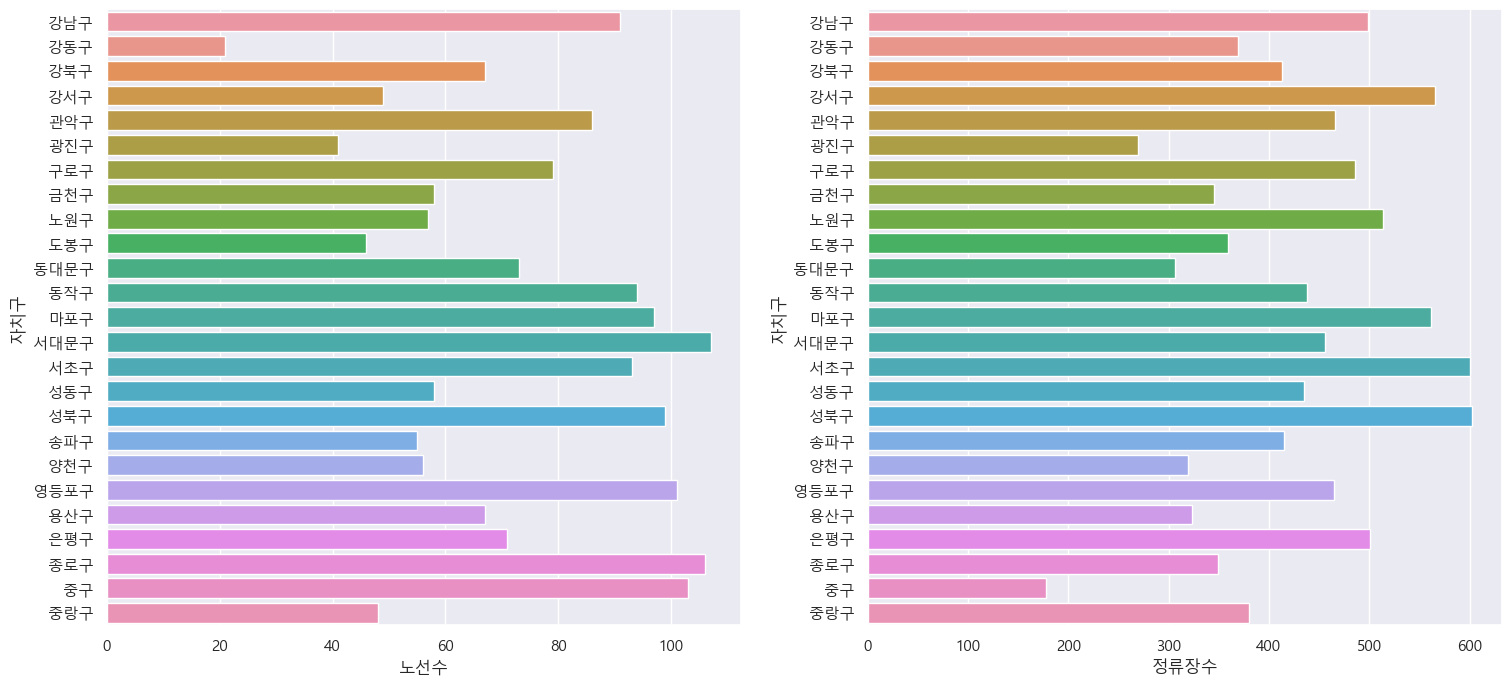

In [128]:
plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 1)
sns.barplot(x = "노선수", y = "자치구", data = seoul_bus_station)
plt.subplot(1, 2, 2)
sns.barplot(x = "정류장수", y = "자치구", data = seoul_bus_station)
plt.show()

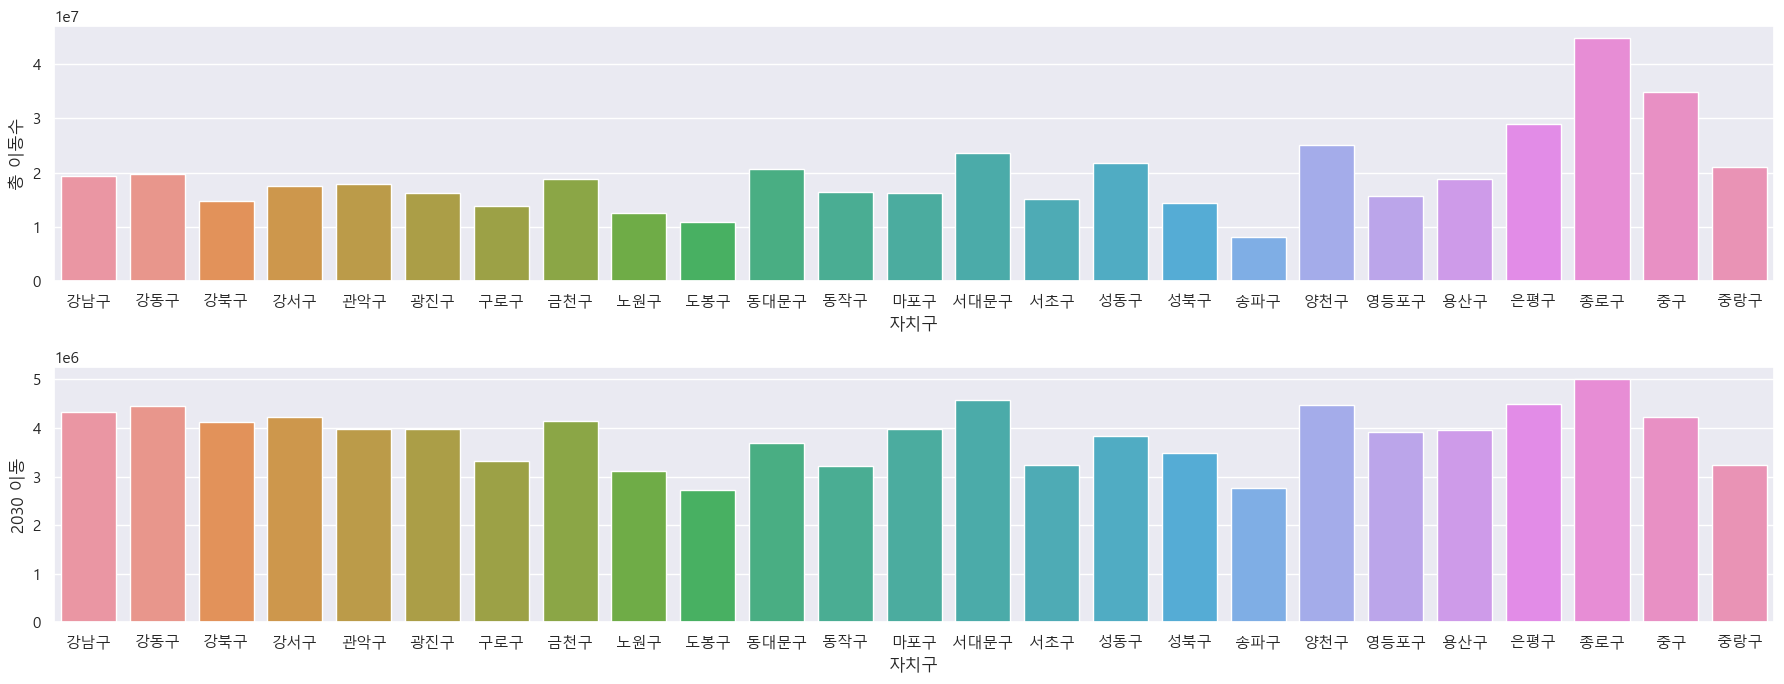

In [110]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize = (18, 7))
plt.subplot(2, 1, 1)
sns.barplot(x = "자치구", y = "총 이동수", data = temp)
plt.ylabel('총 이동수')
plt.subplot(2, 1, 2)
sns.barplot(x = "자치구", y = "2030 이동", data = temp)
plt.ylabel('2030 이동')
plt.tight_layout()
plt.show()

- 정류장 적은 구 top5 : 광진구, 동대문구, 양천구, 용산구, 중구

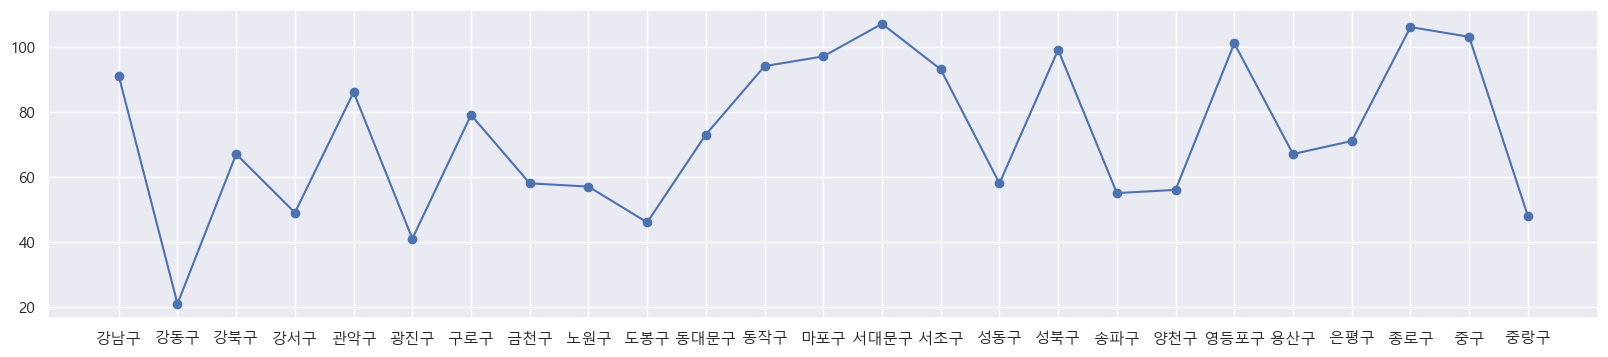

In [52]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize = (20, 4))
plt.plot("자치구", "노선수", "-o", data = seoul_bus_station)
plt.show()

- 노선수 적은 구 top5 : 강동구, 강서구, 광진구, 도봉구, 중랑구

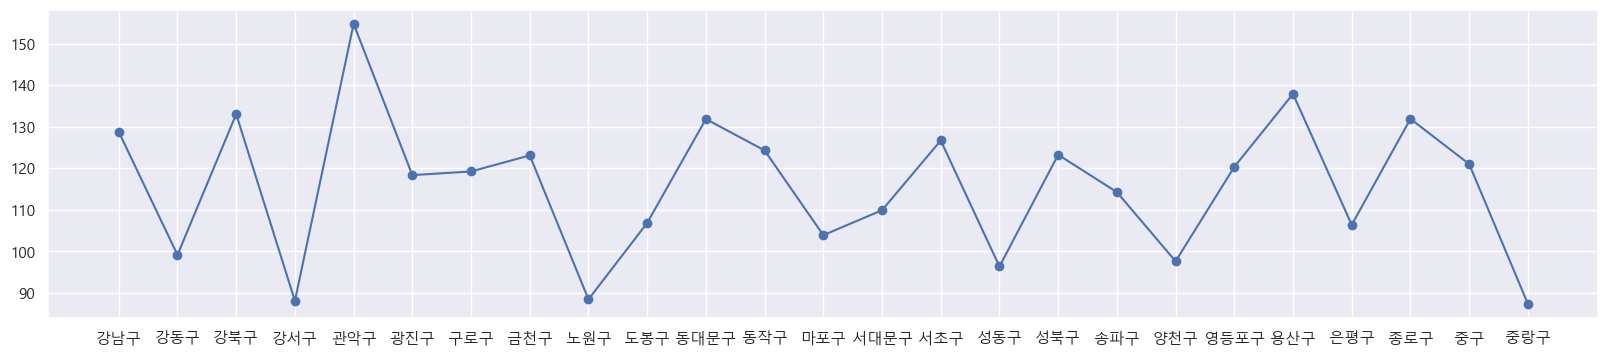

In [54]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize = (20, 4))
plt.plot("자치구", "승차평균승객수", "-o", data = seoul_bus_station)
plt.show()

- 승차 승객 많은 구 top5 : 강북구, 관악구, 동대문구, 용산구, 종로구

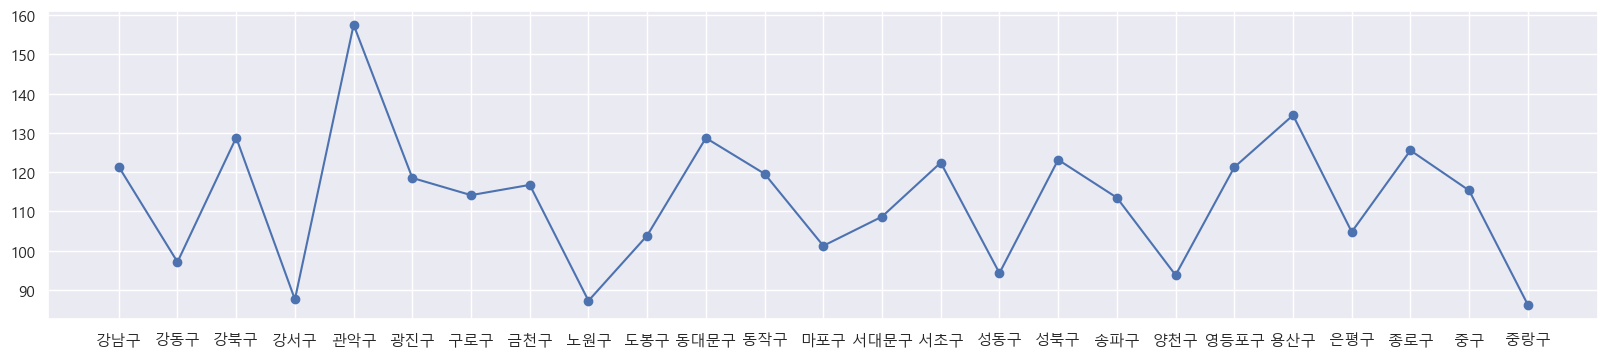

In [55]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize = (20, 4))
plt.plot("자치구", "하차평균승객수", "-o", data = seoul_bus_station)
plt.show()

- 하차 승객 많은 구 top5 : 강북구, 관악구, 동대문구, 용산구, 종로구

# 위 차트를 통해 알게된 사실을 정리해봅시다.
- 정류장 적은 구 top5 : 광진구, 동대문구, 양천구, 용산구, 중구
- 노선수 적은 구 top5 : 강동구, 강서구, 광진구, 도봉구, 중랑구
- 승차 승객 많은 구 top5 : 강북구, 관악구, 동대문구, 용산구, 종로구
- 하차 승객 많은 구 top5 : 강북구, 관악구, 동대문구, 용산구, 종로구

<hr>

- 일부 구는 적은 승하차 승객에 정류장 수와 노선 개수 비율이 맞아 보인다 : 중랑구, 양천구, 성동구
- 일부 구는 적은 승하차 승객에 비해 정류장 수가 많다 : 강서구, 노원구(승하차 승객에 비해 정류장 수는 많고 노선수는 적음)
- 광진구는 위 경우에 비해 승하차 승객은 많은데 정류장 수와 노선 수가 적어 보인다

- 바로 옆 동네인 성동구는 광진구에 비해 승하차 승객은 적은데 버스정류장과 버스 노선은 더 많다

#### 그러므로 광진구에 정류장이나 지나가는 버스노선이 늘어나면 좋지않을까?

---